# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

## Notes From Mentor (Jeremy)

- Income is yearly; loan term is monthly.
- compare train and test accuracies to determine over vs under fit
- PCA to reduce (1) dimensionality & (2) overfitting
- Report on important features
- Use Linear REgression to impute missing data
- Data Imbalance: Note balance of target variable (i.e. 60/40, where 60% is baseline for model accuracy).
- SMOTE library for data imbalance

## Questions:
- My hyperparamterized model performed worse

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pwd

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
print(df.shape)
print(df.info())

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



### Answer 1: applicants with credit history

In [7]:
df[df['Credit_History']==1].shape[0]

475

In [8]:
df[df['Credit_History']==1].shape[0]/df.shape[0]

0.7736156351791531

### Answer 2: Applicant income distribution

In [9]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [10]:
# Note describe counts 0s
df[['TotalIncome','ApplicantIncome','CoapplicantIncome']].describe()

,TotalIncome,ApplicantIncome,CoapplicantIncome
count,614.000000,614.000000,614.000000
mean,7024.705081,5403.459283,1621.245798
std,6458.663872,6109.041673,2926.248369
min,1442.000000,150.000000,0.000000
25%,4166.000000,2877.500000,0.000000
50%,5416.500000,3812.500000,1188.500000
75%,7521.750000,5795.000000,2297.250000
max,81000.000000,81000.000000,41667.000000


(array([513.,  77.,  14.,   1.,   4.,   2.,   1.,   1.,   0.,   1.]),
 array([ 1442. ,  9397.8, 17353.6, 25309.4, 33265.2, 41221. , 49176.8,
        57132.6, 65088.4, 73044.2, 81000. ]),
 <BarContainer object of 10 artists>)

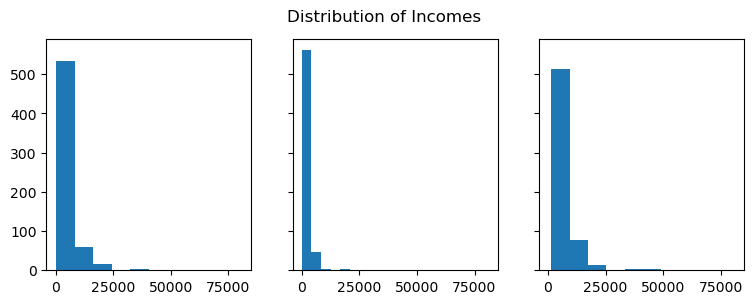

In [11]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(9,3),sharex=True, sharey=True)

#add title
fig.suptitle('Distribution of Incomes')

#add data to plots
axs[0].hist(df['ApplicantIncome'],label='Applicant Income')
axs[1].hist(df['CoapplicantIncome'],label='Coapplicant Income')
axs[2].hist(df['TotalIncome'],label='Total Income')

In [12]:
# Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.
app_mean = df['ApplicantIncome'].mean()
app_median = df['ApplicantIncome'].median()

# Compare the mean and median for 'ApplicantIncome'
print("App Income Mean:", app_mean)
print("App Income Median:", app_median)
if app_mean > app_median:
    print("The Applicant income is right-skewed.")
else:
    print("The Applicant income is left-skewed.")

App Income Mean: 5403.459283387622
App Income Median: 3812.5
The Applicant income is right-skewed.


### Answer 3: Skewness
Yes, the income distributions are right-skewed (mean > median)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [13]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['Loan_ID',
 'Education',
 'Married',
 'Self_Employed',
 'Gender',
 'Loan_Status',
 'Dependents',
 'Property_Area']

In [14]:
print("unique entries in nominal columns:")
print("Dependents:", df['Dependents'].unique())
print("Loan_Status:", df['Loan_Status'].unique())
print("Education:", df['Education'].unique())
print("Self_Employed:", df['Self_Employed'].unique())
print("Property_Area:", df['Property_Area'].unique())
print("Gender:", df['Gender'].unique())
print("Married:", df['Married'].unique())
print("Credit_History:", df['Credit_History'].unique())

unique entries in nominal columns:
Dependents: ['0' '1' '2' '3+' nan]
Loan_Status: ['Y' 'N']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Credit_History: [ 1.  0. nan]


In [15]:
df.describe(exclude='number')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [19]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [22]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



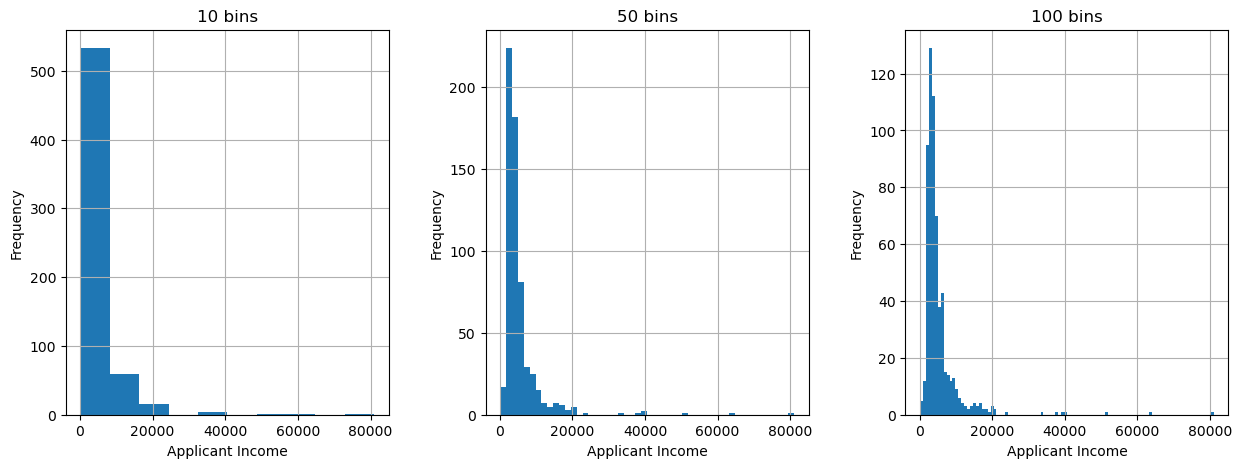

In [23]:
# create a 1x3 subplot grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot the histograms with different bins in each subplot
df['ApplicantIncome'].hist(bins=10, ax=axs[0])
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Frequency')
axs[0].set_title('10 bins')

df['ApplicantIncome'].hist(bins=50, ax=axs[1])
axs[1].set_xlabel('Applicant Income')
axs[1].set_ylabel('Frequency')
axs[1].set_title('50 bins')

df['ApplicantIncome'].hist(bins=100, ax=axs[2])
axs[2].set_xlabel('Applicant Income')
axs[2].set_ylabel('Frequency')
axs[2].set_title('100 bins')

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# display the plot
plt.show()

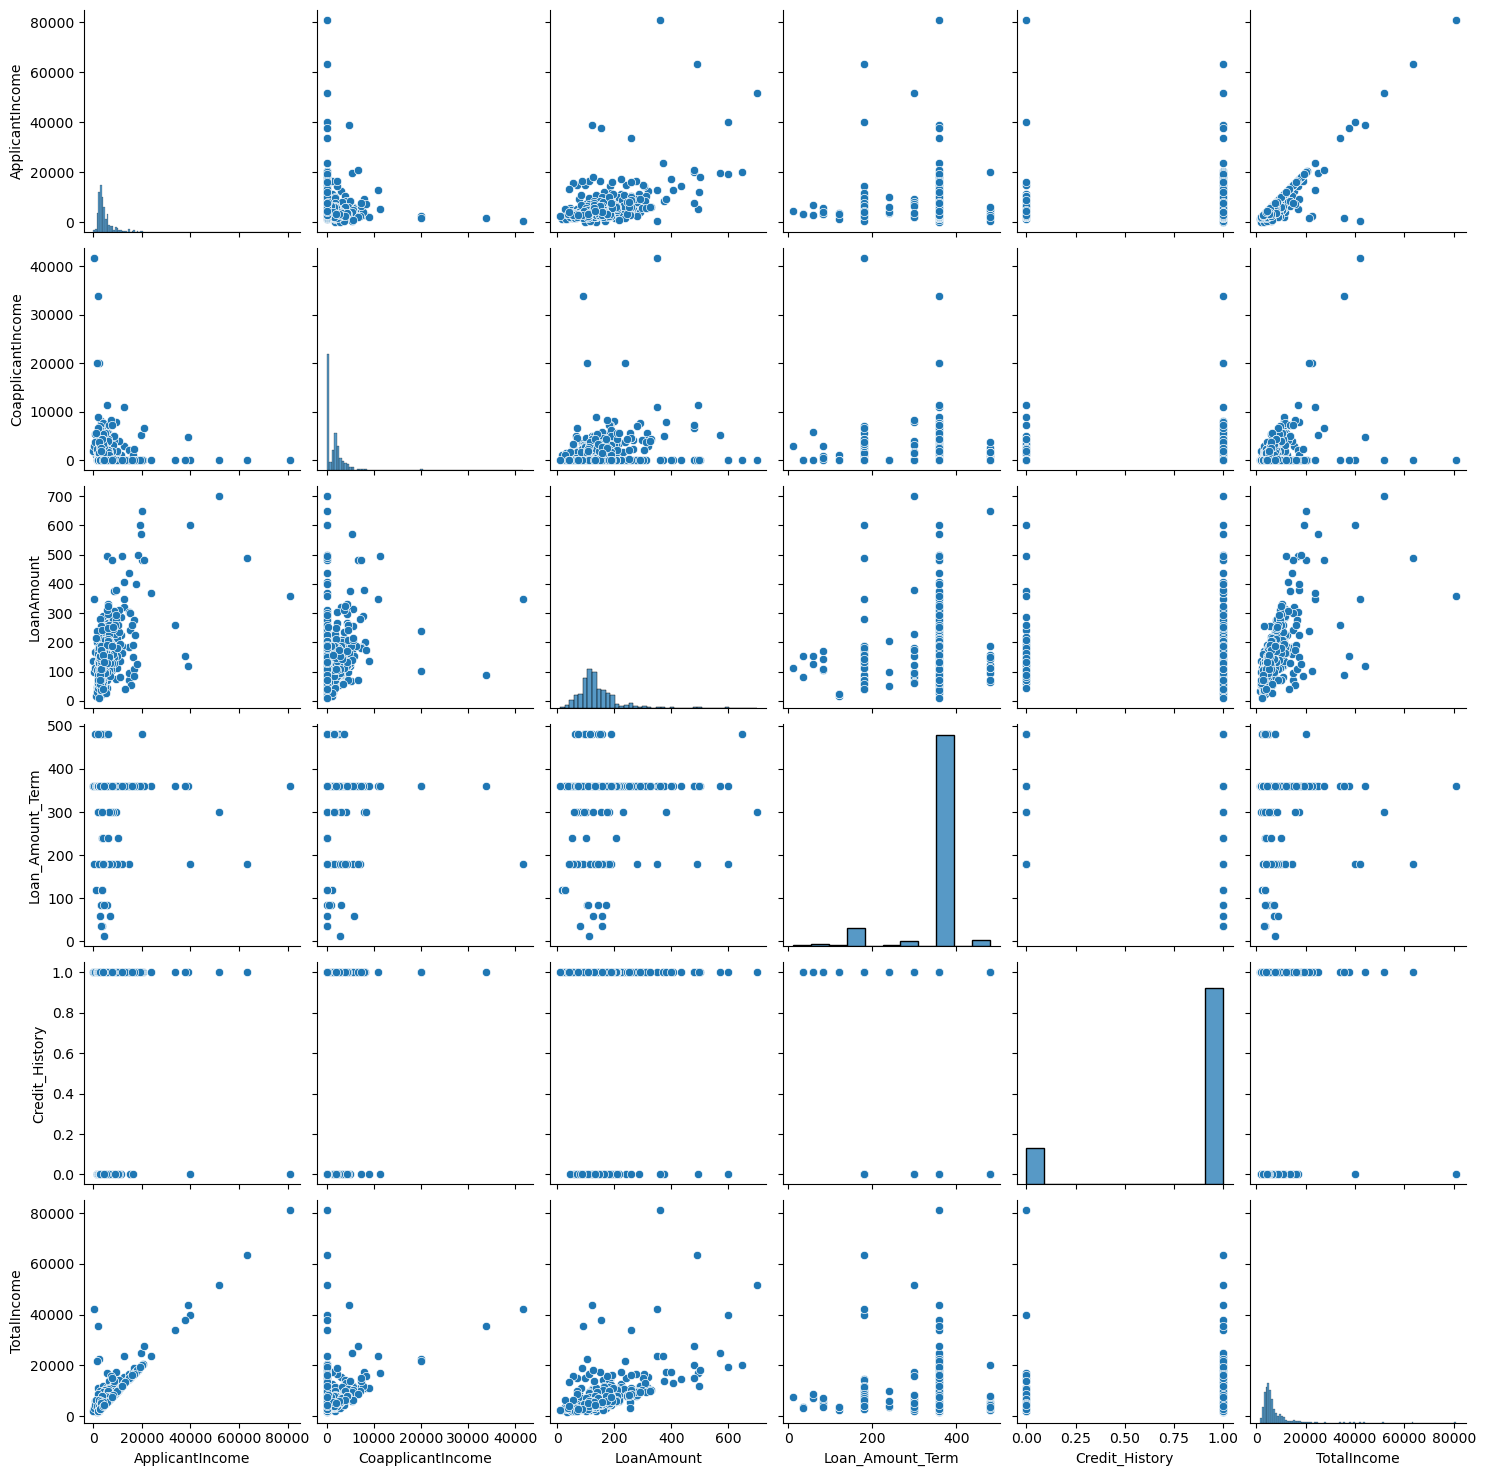

In [24]:
sns.pairplot(df)


Look at box plots to understand the distributions. 

<AxesSubplot:>

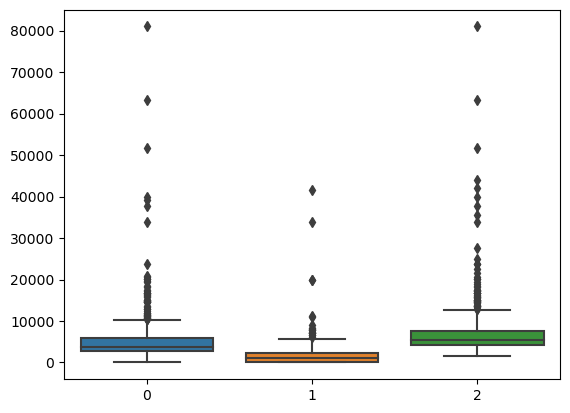

In [25]:
data_1 = df['ApplicantIncome']
data_2 = df['CoapplicantIncome']
data_3 = df['TotalIncome']
income_data = [data_1, data_2, data_3]
sns.boxplot(data=income_data, width=0.8)

# Understanding Target Variable

In [26]:
# Percentage approved
approval_rate = df[df['Loan_Status']=='Y'].shape[0]/df.shape[0]
print(approval_rate)

0.6872964169381107


<AxesSubplot:xlabel='Loan_Status', ylabel='TotalIncome'>

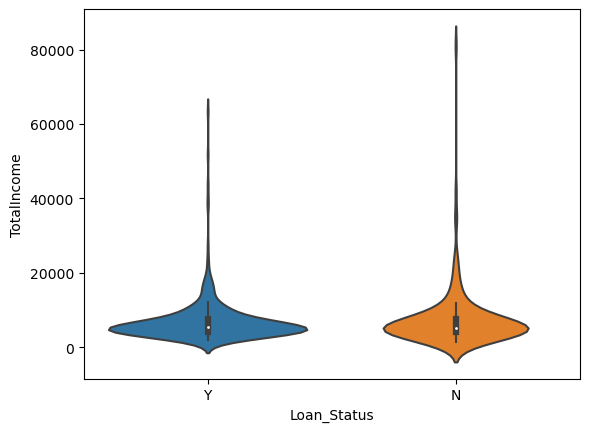

In [27]:
sns.violinplot(x="Loan_Status", y="TotalIncome", data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

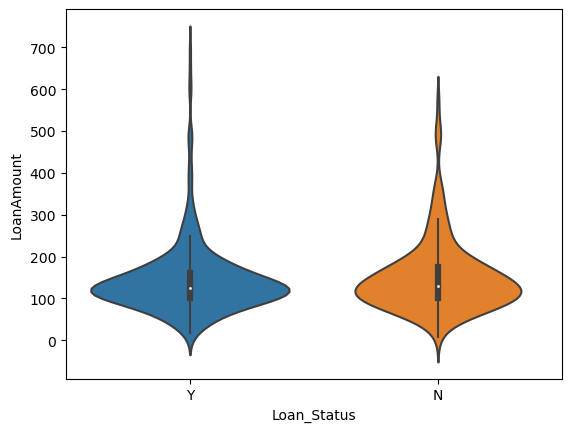

In [28]:
sns.violinplot(x="Loan_Status", y="LoanAmount", data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

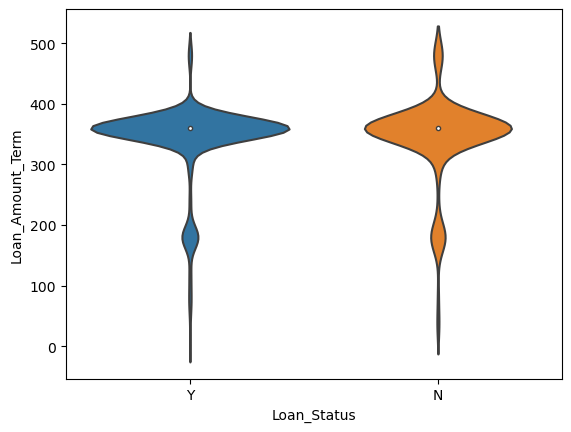

In [29]:
sns.violinplot(x="Loan_Status", y="Loan_Amount_Term", data=df)

In [30]:
# Term, Loan Amount, and Loan Term are not highly correlated with Loan Status

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

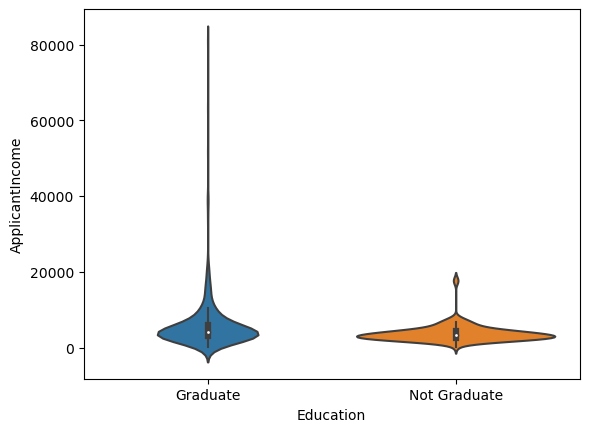

In [31]:
#violin plot to show data distribution in both categories.
sns.violinplot(x="Education", y="ApplicantIncome", data=df)

Text(0.5, 1.0, 'Education and Income')

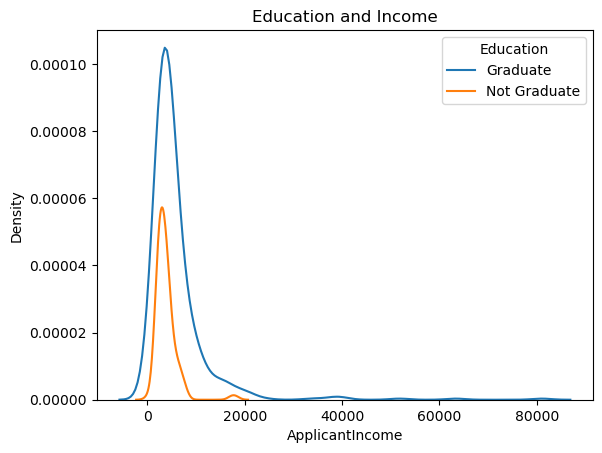

In [32]:
sns.kdeplot(x="ApplicantIncome", data=df, hue="Education")
plt.title("Education and Income")

Look at the histogram and boxplot of LoanAmount

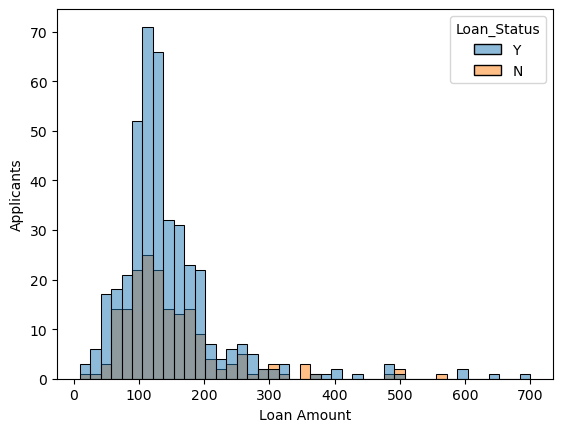

In [33]:
ax = sns.histplot(data = df, x='LoanAmount',hue="Loan_Status")
ax.set(xlabel="Loan Amount", ylabel="Applicants")
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [34]:
df.dtypes

cat_feat = df.dtypes[df.dtypes == 'object'].index.tolist()
cat_feat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [35]:
# Aprovals by Gender
df_approvals_gender = pd.pivot_table(df, values='LoanAmount', index=['Gender'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_gender.columns =['Gender','NoApproved','Approved','Total']
df_approvals_gender['%NoApproved'] = df_approvals_gender['NoApproved'] / df_approvals_gender['Total']* 100
df_approvals_gender['%Approved']   = df_approvals_gender['Approved'] / df_approvals_gender['Total']* 100
df_approvals_gender

,Gender,NoApproved,Approved,Total,%NoApproved,%Approved
0,Female,36,73,109,33.027523,66.972477
1,Male,140,330,470,29.787234,70.212766
2,Total,176,403,579,30.397237,69.602763


In [36]:
# Approvals by Education 
df_approvals_education = pd.pivot_table(df, values='LoanAmount', index=['Education'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_education .columns =['Education','NoApproved','Approved','Total']
df_approvals_education['%NoApproved'] = df_approvals_education['NoApproved'] / df_approvals_education['Total']* 100
df_approvals_education['%Approved']   = df_approvals_education['Approved'] / df_approvals_education['Total']* 100
df_approvals_education 

,Education,NoApproved,Approved,Total,%NoApproved,%Approved
0,Graduate,134,331,465,28.817204,71.182796
1,Not Graduate,47,80,127,37.007874,62.992126
2,Total,181,411,592,30.574324,69.425676


In [37]:
# Approvals by Dependents
df_approvals_Dependents = pd.pivot_table(df, values='LoanAmount', index=['Dependents'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_Dependents.columns =['Dependents','NoApproved','Approved','Total']
df_approvals_Dependents['%NoApproved'] = df_approvals_Dependents['NoApproved'] / df_approvals_Dependents['Total']* 100
df_approvals_Dependents['%Approved']   = df_approvals_Dependents['Approved'] / df_approvals_Dependents['Total']* 100
df_approvals_Dependents

,Dependents,NoApproved,Approved,Total,%NoApproved,%Approved
0,0,101,233,334,30.239521,69.760479
1,1,35,63,98,35.714286,64.285714
2,2,23,75,98,23.469388,76.530612
3,3+,16,33,49,32.653061,67.346939
4,Total,175,404,579,30.224525,69.775475


In [38]:
# Approvals by Self_Employed
df_approvals_self_employed = pd.pivot_table(df, values='LoanAmount', index=['Self_Employed'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_self_employed.columns =['Self_Employed','NoApproved','Approved','Total']
df_approvals_self_employed['%NoApproved'] = df_approvals_self_employed['NoApproved'] / df_approvals_self_employed['Total']* 100
df_approvals_self_employed['%Approved']   = df_approvals_self_employed['Approved'] / df_approvals_self_employed['Total']* 100
df_approvals_self_employed

,Self_Employed,NoApproved,Approved,Total,%NoApproved,%Approved
0,No,148,334,482,30.705394,69.294606
1,Yes,25,54,79,31.645570,68.354430
2,Total,173,388,561,30.837790,69.162210


In [39]:
##Approvals by Property_Area
df_approvals_self_property_area = pd.pivot_table(df, values='LoanAmount', index=['Property_Area'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_self_property_area.columns =['PropertyArea','NoApproved','Approved','Total']
df_approvals_self_property_area['%NoApproved'] = df_approvals_self_property_area['NoApproved'] / df_approvals_self_property_area['Total']* 100
df_approvals_self_property_area['%Approved']   = df_approvals_self_property_area['Approved'] / df_approvals_self_property_area['Total']* 100
df_approvals_self_property_area

,PropertyArea,NoApproved,Approved,Total,%NoApproved,%Approved
0,Rural,66,107,173,38.150289,61.849711
1,Semiurban,53,175,228,23.245614,76.754386
2,Urban,62,129,191,32.460733,67.539267
3,Total,181,411,592,30.574324,69.425676


In [40]:
# Approvals by Married
df_approvals_marital_status = pd.pivot_table(df, values='LoanAmount', index=['Married'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_marital_status.columns =['Married','NoApproved','Approved','Total']
df_approvals_marital_status['%NoApproved'] = df_approvals_marital_status['NoApproved'] / df_approvals_marital_status['Total']* 100
df_approvals_marital_status['%Approved']   = df_approvals_marital_status['Approved'] / df_approvals_marital_status['Total']* 100
df_approvals_marital_status

,Married,NoApproved,Approved,Total,%NoApproved,%Approved
0,No,75,131,206,36.407767,63.592233
1,Yes,106,278,384,27.604167,72.395833
2,Total,181,409,590,30.677966,69.322034


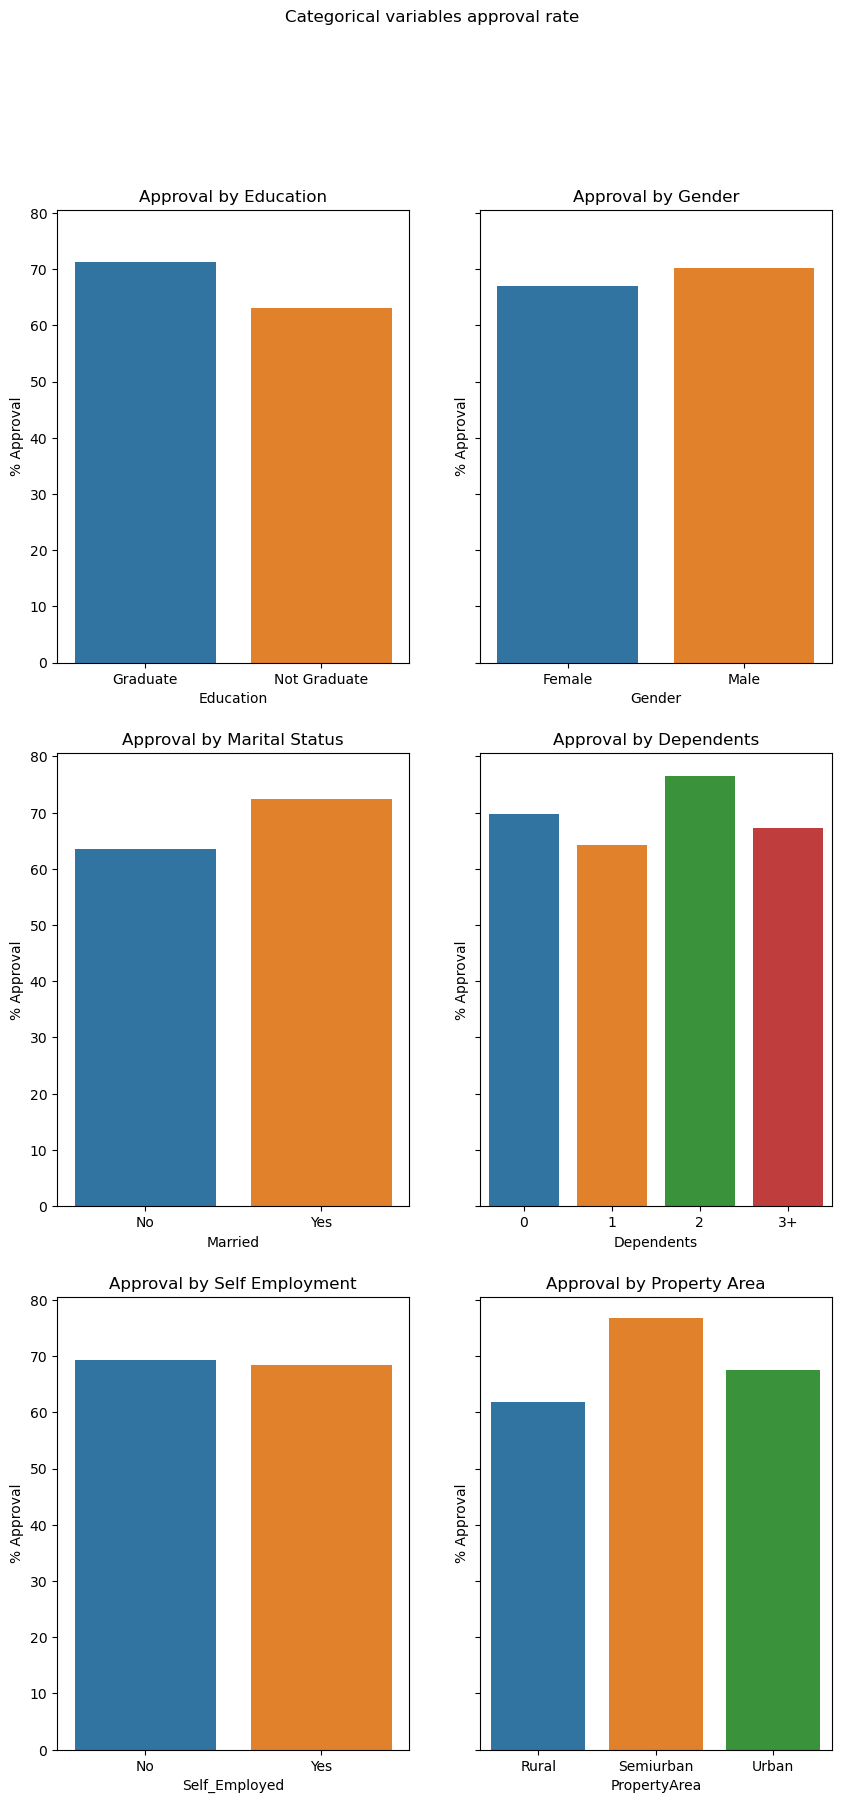

In [41]:
#Graph all the comparissons with categorical variables

fig, ax = plt.subplots(3, 2, figsize=(10, 20), sharey=True)
fig.suptitle('Categorical variables approval rate')
df_approvals_education = df_approvals_education.loc[df_approvals_education.Education !='Total']
df_approvals_gender = df_approvals_gender.loc[df_approvals_gender.Gender !='Total']
df_approvals_marital_status = df_approvals_marital_status.loc[df_approvals_marital_status.Married !='Total']
df_approvals_Dependents = df_approvals_Dependents.loc[df_approvals_Dependents.Dependents !='Total']
df_approvals_self_employed = df_approvals_self_employed.loc[df_approvals_self_employed.Self_Employed !='Total']
df_approvals_self_property_area = df_approvals_self_property_area.loc[df_approvals_self_property_area.PropertyArea !='Total']

sns.barplot(x='Education', y='%Approved', data=df_approvals_education,ax=ax[0,0])
ax[0, 0].set(ylabel="% Approval")
ax[0, 0].set_title('Approval by Education')

sns.barplot(x='Gender', y='%Approved', data=df_approvals_gender,ax=ax[0,1])
ax[0, 1].set(ylabel="% Approval")
ax[0, 1].set_title('Approval by Gender')

sns.barplot(x='Married', y='%Approved', data=df_approvals_marital_status,ax=ax[1,0])
ax[1, 0].set(ylabel="% Approval")
ax[1, 0].set_title('Approval by Marital Status')

sns.barplot(x='Dependents', y='%Approved', data=df_approvals_Dependents,ax=ax[1,1])
ax[1, 1].set(ylabel="% Approval")
ax[1, 1].set_title('Approval by Dependents')

sns.barplot(x='Self_Employed', y='%Approved', data=df_approvals_self_employed,ax=ax[2,0])
ax[2, 0].set(ylabel="% Approval")
ax[2, 0].set_title('Approval by Self Employment')

sns.barplot(x='PropertyArea', y='%Approved', data=df_approvals_self_property_area,ax=ax[2,1])
ax[2, 1].set(ylabel="% Approval")
ax[2, 1].set_title('Approval by Property Area')
#sns.histplot(x='ApplicantIncome', data=df, bins=10, ax=ax[0, 0])

plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [42]:
# Loan Term is never explicitly == 0
df[df['Loan_Amount_Term']==0].count()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [43]:
print("unique entries in nominal columns:")
print("Dependents:", df['Dependents'].unique())
print("Loan_Status:", df['Loan_Status'].unique())
print("Education:", df['Education'].unique())
print("Self_Employed:", df['Self_Employed'].unique())
print("Property_Area:", df['Property_Area'].unique())
print("Gender:", df['Gender'].unique())
print("Married:", df['Married'].unique())

unique entries in nominal columns:
Dependents: ['0' '1' '2' '3+' nan]
Loan_Status: ['Y' 'N']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]


In [44]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

### Note:  In this dataset, my preliminary opinion is that we cannot rely on the relationship of any variables to impute others.

In [45]:
# Fill NANs in Gender & Self_Employed with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [46]:
# Infer 'Married' from Coapplicant Income
missing = df['Married'].isna()

condlist = [ df.loc[missing, 'CoapplicantIncome'] == 0, df.loc[missing, 'CoapplicantIncome'] != 0 ]

choicelist = ["No", "Yes"]

df.loc[missing, 'Married'] = np.select(condlist, choicelist)

In [47]:
# Assume that blank means no children; chosen over inference to show different method
df['Dependents'].fillna(value=0,inplace=True)
df['Credit_History'].fillna(value=0,inplace=True)

In [48]:
# Interpolate Loan Amount & Term
df['LoanAmount'].interpolate(method='linear', inplace=True, limit_direction="both")
df['Loan_Amount_Term'].interpolate(method='linear', inplace=True, limit_direction="both")

In [49]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [50]:
df['LoanAmount_log'] = df['LoanAmount'].apply(lambda x: np.log(np.clip(x, 1, None)))

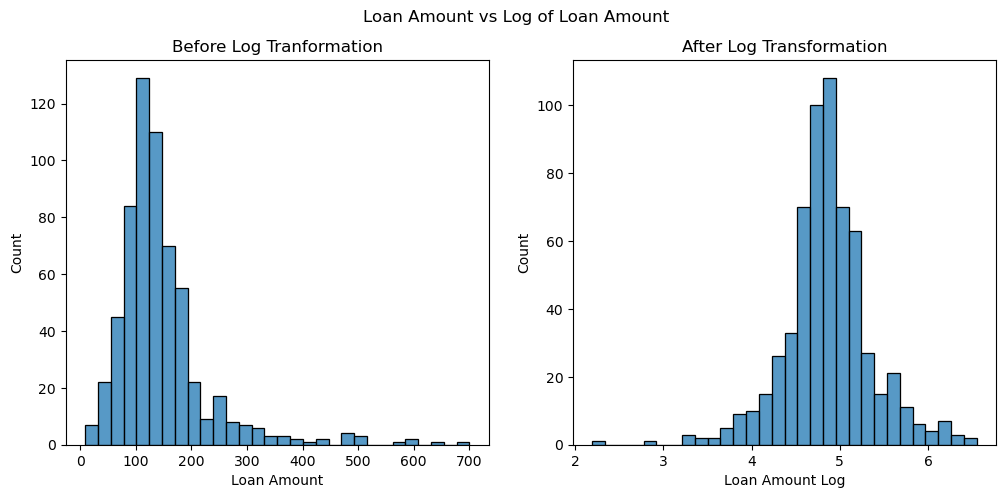

In [51]:
#Graphs Loan Amount
fig, ax = plt.subplots(1, 2, figsize=(12, 5))#, sharey=True)
fig.suptitle('Loan Amount vs Log of Loan Amount')

sns.histplot(x='LoanAmount', data=df, bins=30, ax=ax[0])
ax[0].set(xlabel="Loan Amount", ylabel="Count")
ax[0].set_title('Before Log Tranformation')

sns.histplot(x='LoanAmount_log', data=df, bins=30, ax=ax[1])
ax[1].set(xlabel="Loan Amount Log", ylabel="Count")
ax[1].set_title('After Log Transformation')

plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [52]:
df['TotalIncome_log'] = df['TotalIncome'].apply(lambda x: np.log(np.clip(x, 1, None)))
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515


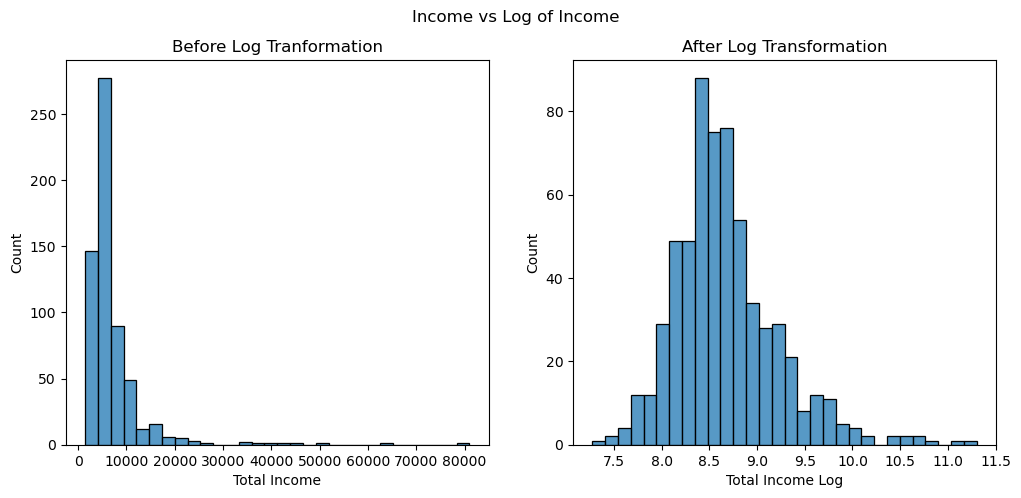

In [53]:
#Graphs ApplicantIncome
fig, ax = plt.subplots(1, 2, figsize=(12, 5))#, sharey=True)
fig.suptitle('Income vs Log of Income')

sns.histplot(x='TotalIncome', data=df, bins=30, ax=ax[0])
ax[0].set(xlabel="Total Income", ylabel="Count")
ax[0].set_title('Before Log Tranformation')

sns.histplot(x='TotalIncome_log', data=df, bins=30, ax=ax[1])
ax[1].set(xlabel="Total Income Log", ylabel="Count")
ax[1].set_title('After Log Transformation')

plt.show()

# Encode categories

In [54]:
# Convert Dependents from categorical to numerical
df['Dependents'] = df['Dependents'].replace(to_replace="3+", value=3.5)

In [55]:
# df['Gender']=pd.get_dummies(df['Gender'], drop_first=True).rename(columns={'Gender':'Male'})
# df['is_graduated'] = np.where(df['Education'] == 'Graduate', 1, 0)
df = pd.get_dummies(df, columns=['Gender','Married','Education','Self_Employed','Loan_Status','Property_Area'], drop_first=True)

In [56]:
df.head(5)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log,TotalIncome_log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,5849.0,4.852030,8.674026,1,0,0,0,1,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,6091.0,4.852030,8.714568,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,3000.0,4.189655,8.006368,1,1,0,1,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,4941.0,4.787492,8.505323,1,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,6000.0,4.948760,8.699515,1,0,0,0,1,0,1


In [57]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    float64
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   TotalIncome              614 non-null    float64
 8   LoanAmount_log           614 non-null    float64
 9   TotalIncome_log          614 non-null    float64
 10  Gender_Male              614 non-null    uint8  
 11  Married_Yes              614 non-null    uint8  
 12  Education_Not Graduate   614 non-null    uint8  
 13  Self_Employed_Yes        614 non-null    uint8  
 14  Loan_Status_Y            6

## 4. Building a Predictive Model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [60]:
# Initialize X & y
X = df.drop(['Loan_Status_Y','Loan_ID','LoanAmount','ApplicantIncome','CoapplicantIncome','TotalIncome'],axis=1)
y = df['Loan_Status_Y']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [61]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression Model

In [62]:
#instantiate
lr = LogisticRegression(max_iter=1000)

# fit model to training data
lr.fit(X_train, y_train)

# make predictions on test data
y_pred = lr.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 75.14%
Precision: 76.56%
Recall: 67.08%
F1 score: 68.07%


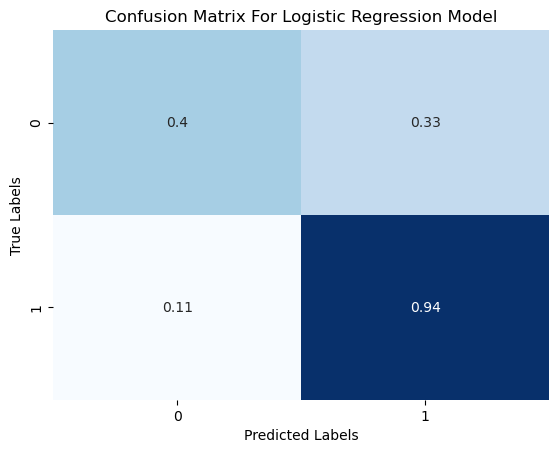

In [64]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# normalize confusion matrix
cmn = cm/cm.astype(np.float).sum(axis=1)

# create a heatmap of the confusion matrix
sns.heatmap(cmn, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix For Logistic Regression Model")
plt.show()

### Random Forest Classifier

In [65]:
#instantiate
rfc = RandomForestClassifier()

# fit model to training data
rfc.fit(X_train,y_train)

# make predictions on test data
y_pred = rfc.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 75.68%
Precision: 74.36%
Recall: 69.97%
F1 score: 71.04%


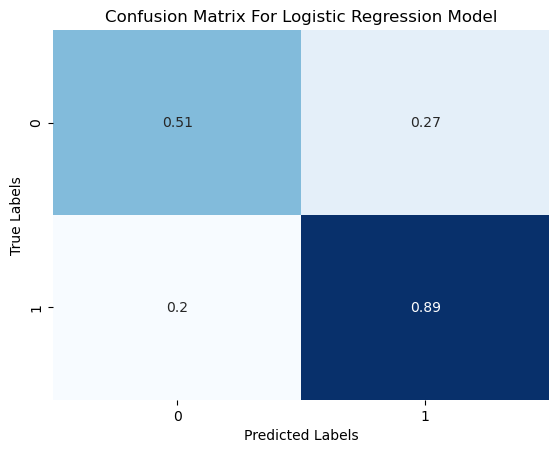

In [67]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# normalize confusion matrix
cmn = cm/cm.astype(np.float).sum(axis=1)

# create a heatmap of the confusion matrix
sns.heatmap(cmn, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix For Logistic Regression Model")
plt.show()

Try paramater grid search to improve the results

### Random Forest had the best pefromance, so we'll select that model for hyperparameter tuning.

In [68]:
#Define Hyper parameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 2, 4, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: {:.2f}%".format(grid_search.best_score_ * 100))

Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Best accuracy score: 75.05%


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [70]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV, train_test_split

In [71]:
df_p = pd.read_csv('data.csv')
df_p = df_p.drop('Loan_ID',axis=1)
df_p.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])
amount_transform = Pipeline([("impute_mean", SimpleImputer(strategy='mean')),("log_transform", PowerTransformer())])

In [73]:
data_processing = ColumnTransformer([('numeric',numeric_transform,['Loan_Amount_Term']),
                                     ('categorical',categorical_transform,['Gender','Married','Credit_History','Dependents','Education','Self_Employed','Credit_History','Property_Area']),
                                     #('sumcolumns',sum_columnsp,['ApplicantIncome','CoapplicantIncome']),
                                     #('columndroper', column_dropper,['ApplicantIncome','CoapplicantIncome']),
                                     ('amount', amount_transform,['ApplicantIncome','CoapplicantIncome','LoanAmount'] )])
#columns_processing = ColumnTransformer([('sumcolumns',sum_columnsp,['ApplicantIncome','CoapplicantIncome']),
#                                        ('columndroper', column_dropper,['ApplicantIncome','CoapplicantIncome'])])

In [74]:
feature_union = FeatureUnion([('pca', PCA(n_components=2)), 
                              ('select_best', SelectKBest(k=3))])

In [75]:
model = RandomForestClassifier(criterion='gini',max_depth=7, min_samples_leaf = 4, min_samples_split=2,n_estimators=10)

In [76]:
pipeline = Pipeline(steps=[('preprocessing', data_processing),
                            ('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', model)])

In [77]:
X = df_p.drop('Loan_Status', axis=1)
y = df_p['Loan_Status']

In [78]:
tsize = 0.25
rstate = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=rstate)

In [79]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender'

In [80]:
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 76.62%
Precision: 81.06%
Recall: 67.94%
F1 score: 69.10%


In [81]:
#hyper parameter tuning
#model = RandomForestClassifier()
pipeline = Pipeline(steps=[('preprocessing', data_processing),
                            ('scaling', StandardScaler()),
                           #('features', feature_union),
                           ('model', RandomForestClassifier())])
param_grid = {
    #'features__pca__n_components': [3, 5,None],
    #'features__select_best__k': [1, 3, 6,None],
    'model__n_estimators': [10, 50, 100],
    'model__max_depth': [3, 5, None],
    'model__criterion':['gini','log_loss'],
    'model__min_samples_leaf' : [1,3,4], 
    'model__min_samples_split':[1,2,3,5] 
}

In [82]:
pipe_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5) 
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Loan_Amount_Term']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_mode',
                                                                                          SimpleImputer(strategy='most_frequen

In [83]:
best_hyperparams = pipe_grid.best_params_
best_acc = pipe_grid.score(X_test, y_test)*100
print("Best Test Set Accuracy: {:.2f}%".format(best_acc))
print(f'Achieved with hyperparameters: {best_hyperparams}')

Best Test Set Accuracy: 77.92%
Achieved with hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 10}


In [84]:
# keep selected pipe model as final
final_pipe = pipe_grid.best_estimator_
print(final_pipe)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender'

In [85]:
#Save Pickle

import pickle
with open('../data/loan_model.pkl', 'wb') as file:
    pickle.dump(final_pipe, file)
    
# pickle.dump(pipeline, open('../data/classifier.pkl', 'wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [86]:
# Test load the pickle file
with open('../data/loan_model.pkl', 'rb') as file:
    loan_model = pickle.load(file)   
    
# Test predictions
predictions = loan_model.predict(X_test)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
      dtype=object)

### API Creation

In [98]:
json_data = {"LoanAmount": 20000000, 
                 "ApplicantIncome": 70,
                 "CoapplicantIncome": 0,
                 "Loan_Amount_Term": 360, 
                 "Credit_History": 0, 
                 "Gender": "Female", 
                 "Married": "Yes", 
                 "Dependents": "0", 
                 "Education": "Not Graduate", 
                 "Self_Employed": "No", 
                 "Property_Area": "Urban"}

In [99]:
import requests
URL = "http://127.0.0.1:5000/predict"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

print(r.json())

['N']
